## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Ibrahim Salim

Full time Hybrid student

Deadline submission: 28th March 2025 at 6p.m

Samwel Karu


# *Step 1* Load the Dataset

In [83]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [84]:
df = pd.read_csv("data/Aviation_Data.csv")

c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# *Step 2* Understand the Data

In [85]:
#This is a user defined function that helps you understand the data 
def inspect_dataset(path):
    df=pd.read_csv(path)
    print('--------data info------')
    print(df.info())
    print('--------data describe-------')
    print(df.describe())
    print('-------data shape----')
    print(df.shape)
    return inspect_dataset

In [86]:
inspect_dataset("data/Aviation_Data.csv")

--------data info------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make          

c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


<function __main__.inspect_dataset(path)>

# *Step 3* Check and Handle missing values

In [87]:
df.head() #This gives the first 5 rows of the dataset

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [88]:
df.isnull().sum() #it checks for missing (NaN) values in each column of your DataFrame and returns a count of missing values per column.

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [89]:


# Calculate missing percentages
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display missing values sorted in descending order
print(missing_percentage.sort_values(ascending=False))


Schedule                  86.073848
Air.carrier               81.573471
FAR.Description           64.555939
Aircraft.Category         64.263736
Longitude                 61.954886
Latitude                  61.944924
Airport.Code              44.382831
Airport.Name              41.570372
Broad.phase.of.flight     31.681941
Publication.Date          18.471909
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Fatal.Injuries      14.233851
Engine.Type                9.447913
Report.Status              8.677558
Purpose.of.flight          8.468367
Number.of.Engines          8.348829
Total.Uninjured            8.158454
Weather.Condition          6.586753
Aircraft.damage            5.150086
Registration.Number        3.072564
Injury.Severity            2.721698
Country                    1.865011
Amateur.Built              1.727764
Model                      1.716695
Make                       1.684597
Location                   1.672422
Event.Date                 1

>  **Above is a percentile output of the missing values per column and as per personal research and decision any value above 50% was dropped using the code below** 

In [90]:
high_missing_values=['Schedule','Air.carrier','FAR.Description','Aircraft.Category','Longitude','Latitude']

df_cleaned=df.drop(columns=high_missing_values)

Below are the columns with a percentage ranging from 30% - 40% the *fillna* method was used to fill both numerical and categorical data

In [91]:
for col in ['Airport.Code', 'Airport.Name']:
    df_cleaned[col].fillna('Unknown', inplace=True)

df_cleaned['Broad.phase.of.flight'].fillna(df_cleaned['Broad.phase.of.flight'].mode()[0], inplace=True)

df_cleaned.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Unknown,Unknown,Fatal(3),Destroyed,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Fatal(1),Destroyed,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [92]:
# Fill categorical values with 'Unknown'
categorical_cols = ['Engine.Type', 'Report.Status', 'Purpose.of.flight', 'Weather.Condition','Injury.Severity','Publication.Date']
for col in categorical_cols:
    df_cleaned[col].fillna('Unknown', inplace=True)

# Fill numerical columns with 0 (assuming missing means no injury)
low_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries']
for col in low_cols:
    df_cleaned[col].fillna(0, inplace=True)


In [93]:
# Fill remaining missing values with mode
remaining_cols = ['Aircraft.damage', 'Registration.Number', 'Country', 'Make', 'Model', 'Location','Amateur.Built','Number.of.Engines']
for col in remaining_cols:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)


In [94]:
print(f"Missing values after cleaning are:\n{df_cleaned.isnull().sum()}") #use of a format string to check output of missing values in the various columns.


Missing values after cleaning are:
Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                      0
Country                       0
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date              0
dtype: int64


In [95]:
injury_cols = ['Total.Minor.Injuries', 'Total.Uninjured'] # a list of remaining columns with numerical missing values
df_cleaned[injury_cols] = df_cleaned[injury_cols].fillna(0) #assuming missing means not injured we replace with 0

df_cleaned.dropna(subset=['Accident.Number','Event.Id','Event.Date'],inplace=True)# removes any rows where at least one of these key columns is missing:


In [96]:
print(f'Total duplicated rows are:{ df_cleaned.duplicated().sum()}')
print(f'After counter-checking the missing values are:\n{df_cleaned.isnull().sum()}')

Total duplicated rows are:0
After counter-checking the missing values are:
Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64


#  *Step 4*  Standardise Data Formats

In [97]:
date_cols = ['Event.Date', 'Publication.Date'] 
df_cleaned[date_cols] = df_cleaned[date_cols].apply(lambda x: pd.to_datetime(x, errors='coerce').dt.strftime('%Y-%m-%d')) 

# Convert 'Event.Date' and 'Publication.Date' columns to datetime format and standardize them to 'YYYY-MM-DD'
# - `pd.to_datetime(x, errors='coerce')` converts values to datetime format, replacing invalid values with NaT.
# - `.dt.strftime('%Y-%m-%d')` formats the dates in a consistent way (YYYY-MM-DD).






In [98]:
std_columns=['Country','Aircraft.damage','Injury.Severity','Make']

for std in std_columns:  
    # Convert text to lowercase using .str.lower() to ensure uniform formatting
    # Remove any leading or trailing spaces using .str.strip() to avoid duplicate categories
    df_cleaned[std].str.lower().str.strip()

df_cleaned['Make'] = df_cleaned['Make'].str.lower()



In [99]:
df_cleaned['Amateur.Built'] = df_cleaned['Amateur.Built'].str.lower().map({'yes': True, 'no': False}) #converts categorical text into boolean


In [100]:
numeric_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(pd.to_numeric, errors='coerce')
#apply(pd.to_numeric) → Converts each column in numeric_cols to numeric format (integers or floats).
#errors='coerce' → Replaces any invalid (non-numeric) values with NaN instead of raising an error.


In [101]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 90347
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Airport.Code            88889 non-null  object 
 7   Airport.Name            88889 non-null  object 
 8   Injury.Severity         88889 non-null  object 
 9   Aircraft.damage         88889 non-null  object 
 10  Registration.Number     88889 non-null  object 
 11  Make                    88889 non-null  object 
 12  Model                   88889 non-null  object 
 13  Amateur.Built           88889 non-null  bool   
 14  Number.of.Engines       88889 non-null

In [102]:

print(f'Counter check 2; the missing values are:\n{df_cleaned.isnull().sum()}')

Counter check 2; the missing values are:
Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date          15230
dtype: int64


In [103]:
df_cleaned['Publication.Date'].fillna('unknown',inplace=True)
print(f'The Final Counter check .\n The missing values are:\n{df_cleaned.isnull().sum()}')

The Final Counter check .
 The missing values are:
Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64


# *step 5* Visualization of Data


In [104]:
df_cleaned.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

> ### Yearly Aviation Accidents Trend

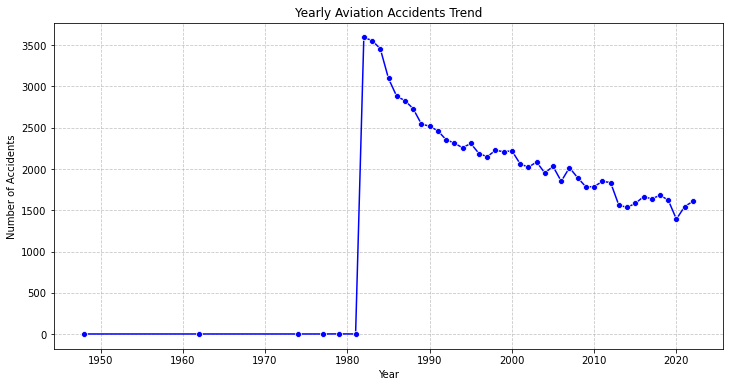

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract year from Event.Date
df_cleaned['Event.Year'] = pd.to_datetime(df_cleaned['Event.Date'], errors='coerce').dt.year

# Count accidents per year
accidents_per_year = df_cleaned.groupby('Event.Year').size().reset_index(name='Accident Count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Event.Year', y='Accident Count', data=accidents_per_year, marker='o', color='b')

# Labels & Title
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Yearly Aviation Accidents Trend')
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()


The above line plot reflects on the  number of Aviation accidents per year which shows a **downward trend** highlghting the importance of safety.

>> ### Top 10 Countries with Most Aviation Accidents

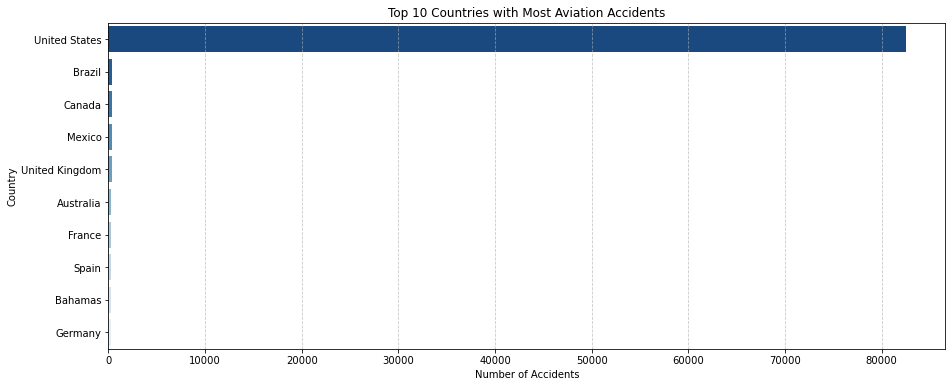

In [106]:
accident_count_country = df_cleaned.groupby('Country').size().reset_index(name='Accident Count')

plt.figure(figsize=(15,6))
top_countries = accident_count_country.sort_values(by='Accident Count', ascending=False).head(10)  # Top 10 countries

sns.barplot(x='Accident Count', y='Country', data=top_countries, palette='Blues_r')

plt.xlabel('Number of Accidents')
plt.ylabel('Country')
plt.title('Top 10 Countries with Most Aviation Accidents')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


The bar chart shows the countries with most aviation accidents in recent times with U.S.A topping the chart.The U.S. tops the list due to its massive aviation industry, strong reporting, and general aviation sector. It doesn’t mean it’s the most dangerous—it just has the highest flight volume and best reporting transparency.



>>> ### Top 10 Aircraft Types Involved in Accidents

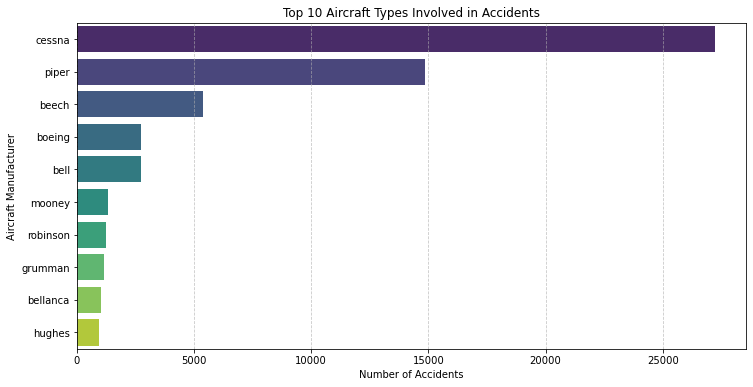

In [107]:
plt.figure(figsize=(12, 6))

# Count of accidents by Aircraft Make
aircraft_accidents = df_cleaned['Make'].value_counts().head(10).reset_index()
aircraft_accidents.columns = ['Aircraft Make', 'Accident Count']

# Plot
sns.barplot(x='Accident Count', y='Aircraft Make', data=aircraft_accidents, palette='viridis')

# Labels & Title
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Manufacturer')
plt.title('Top 10 Aircraft Types Involved in Accidents')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()







Cessna recorded the highest number of accidents in the dataset.

Mooney had the least accidents among the top 10 manufacturers

>>>> ### Accidents by Flight Phase

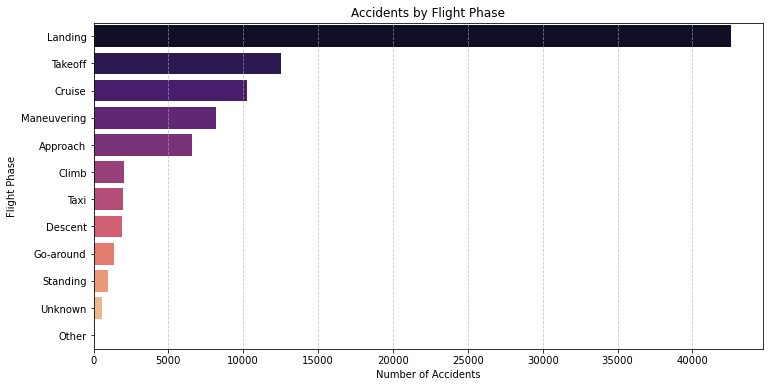

In [108]:

plt.figure(figsize=(12, 6))

# Count of accidents per flight phase
flight_phase_accidents = df_cleaned['Broad.phase.of.flight'].value_counts().reset_index()
flight_phase_accidents.columns = ['Flight Phase', 'Accident Count']

# Plot
sns.barplot(x='Accident Count', y='Flight Phase', data=flight_phase_accidents, palette='magma')

# Labels & Title
plt.xlabel('Number of Accidents')
plt.ylabel('Flight Phase')
plt.title('Accidents by Flight Phase')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


Our analysis shows that [most accidents occur during **Takeoff/Landing/Cruise**]. This presents a major safety risk in aviation. Our startup can address this by developing [automated safety solutions/pilot training enhancements/real-time monitoring tools]. This will reduce accident rates, improve operational efficiency, and position us as a leader in aviation safety innovation."



In [109]:
df_cleaned.to_csv("Aviation_Data_cleaned.csv", index=False) #converts the DataFrame df_cleaned into a csv file saved under Aviation_Data
